In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from numpy.linalg import solve

In [2]:
L = 1e-8
m = 9.109e-31
sigma = L/25
kappa = 500/L
omega = 3e15
x = np.linspace(-L/2, L/2, 1024)
x = x[1:-1]
a = x[1] - x[0]
tau = 1e-18
hbar = 6.62607015e-34 / (2*np.pi)
V0 = 6e-17
x1 = L/4

def normal(phi, x):
    """ Function to calculate normalization factor of wave function
    INPUT:
        phi[float]: wavefunction
        x[float]: position array
    OUTPUT:
        phi0[float]: normalization factor
    """
    phi0 = np.sqrt( np.sum(np.conj(phi)*phi*a) )
    return phi0


def pdf(phi):
    """ Function to calculate probability density function of wave function
    INPUT:
        phi[float]: wavefunction
    OUTPUT:
        pdf[float]: probability density function
    """
    pdf = np.conj(phi)*phi
    return pdf


def energy(phi, HD):
    """ Function to calculate energy of wave function
    INPUT:
        phi[float]: wavefunction
        HD[2d array]: Hamiltonian matrix
    OUTPUT:
        E[float]: energy
    """
    E = np.matmul(HD, phi)
    E = np.conj(phi)*E
    E = np.sum( E * a)
    return E

def xhat(phi, x):
    """ Function to calculate energy of wave function
    INPUT:
        phi[float]: wavefunction
        x[float]: position array
    OUTPUT:
        xexp[float]: expected location <X>
    """
    xexp = np.sum( np.conj(phi)*x*phi * a)
    return xexp



def square(x):
    """ Function to calculate square potential
    INPUT:
        x[float]: position array
    OUTPUT:
        V[float]: potential
    """
    V = np.zeros((1022))
    return V


def oscillator(x):
    """ Function to calculate harmonic potential
    INPUT:
        x[float]: position array
    OUTPUT:
        V[float]: potential
    """
    V = np.zeros((1022))
    V[:] = 1/2*m*omega**2*x**2
    return V
    
def double(x):
    """ Function to calculate double-wall potential
    INPUT:
        x[float]: position array
    OUTPUT:
        V[float]: potential
    """
    V = np.zeros((1022))
    V[:] = V0* ((x**2)/(x1) - 1)**2
    return V


def hamilt(V):
    """ Function to calculate Hamiltonian matrix
    INPUT:
        x[float]: position array
        V[float]: potential
    OUTPUT:
        hd[2d array]: Halmiltonian matrix
    """
    A = -hbar**2/(2*m*a**2)
    B = V - 2*A
    D = np.diag(B, k=0)
    sup = A*np.eye(1022, k=1)
    sub = A*np.eye(1022, k=-1)
    hd = D + sub + sup
    return hd

In [4]:
L = 1e-8
m = 9.109e-31
sigma = L/25
kappa = 500/L
tau = 1e-18
hbar = 6.62607015e-34 / (2*np.pi)


# define array of positions
x = np.linspace(-L/2, L/2, 1024)
x = x[1:-1]
a = x[1] - x[0]

# time steps and initial positon
N = 4000
x0 = L/5
T = np.arange(tau, (N+1)*tau, tau)


# calculate initial condition of wavefunction
phi = np.exp( -(x - x0)**2/(4*sigma)**2 + 1j*kappa*x )
phi0 = normal(phi, x)
phi = phi/phi0

# define potential
V = oscillator(x)
# calculate Hamiltanion matrix
HD = hamilt(V)
Lmat = np.eye(1022) + 1j*tau/(2*hbar)*HD
Rmat = np.eye(1022) - 1j*tau/(2*hbar)*HD

# define arrays for outputs
phi0s = []
Es = []
xexps = [] 
phis = np.zeros((len(T) + 1, len(phi)))
phis[0] = phi

# loop over to solve PDF
counter=1
for tnow in T:
    v = np.matmul(Rmat, phi)
    phi = solve(Lmat, v)
    phi0s.append( normal(phi, x) )
    Es.append( energy(phi, HD) )
    xexps.append( xhat(phi, x) )
    phis[counter] = phi
    counter += 1

<ipython-input-4-21ce8ba17fa8>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  phis[0] = phi
<ipython-input-4-21ce8ba17fa8>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  phis[counter] = phi


C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


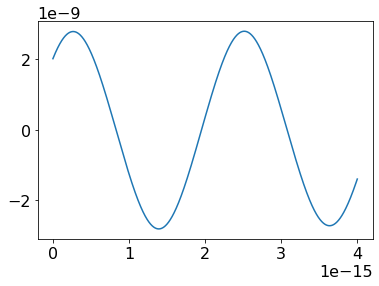

In [5]:
plt.plot(T, xexps)